<a href="https://colab.research.google.com/github/mnilsson8/DSPS_mNilsson/blob/main/HW10/NeuralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [67]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [68]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [69]:
x_train = x_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [72]:
x_train.shape

(60000, 28, 28, 1)

In [73]:
x_test.shape

(10000, 28, 28, 1)

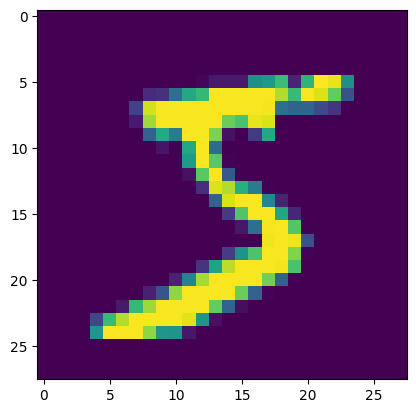

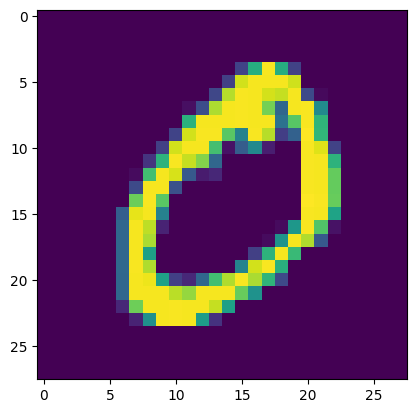

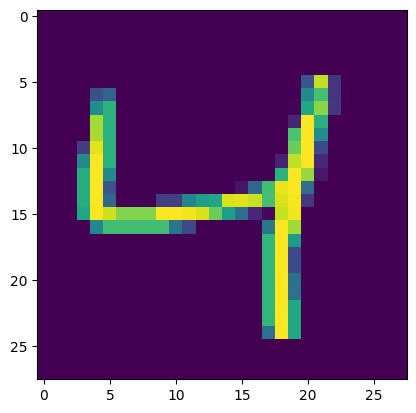

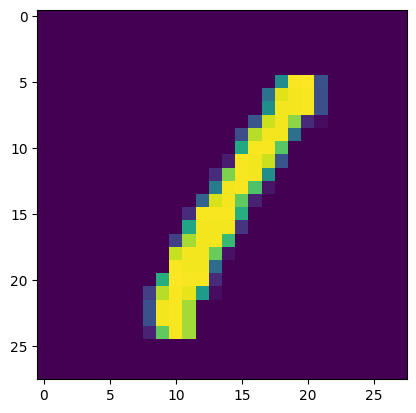

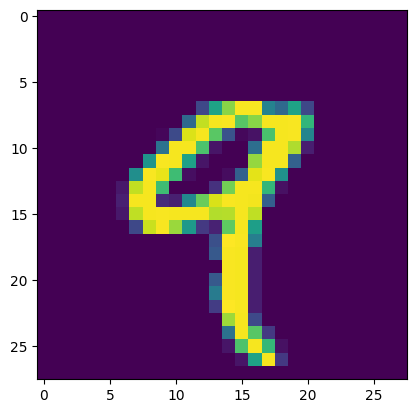

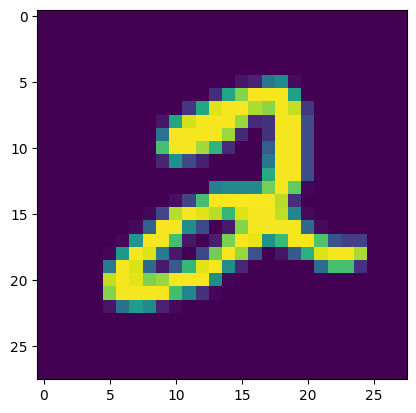

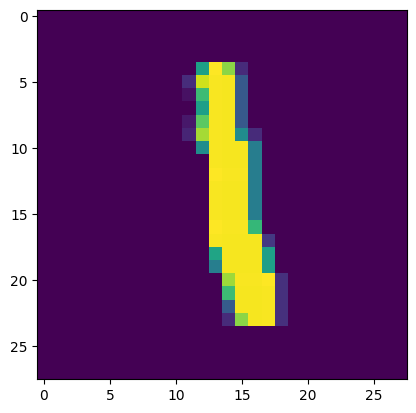

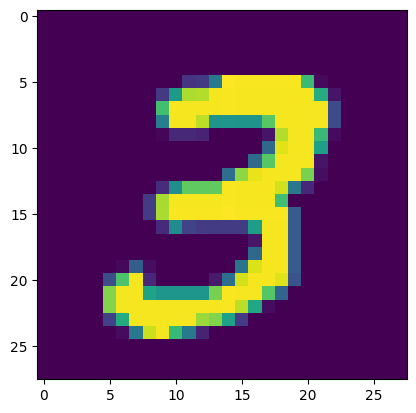

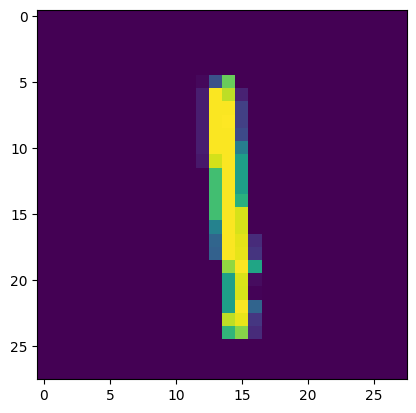

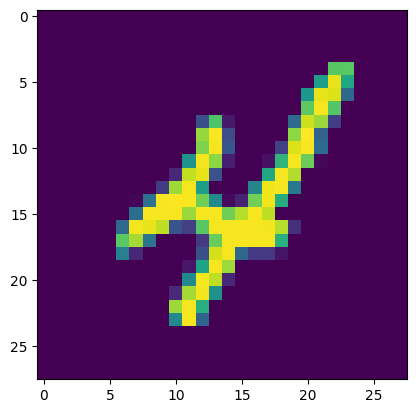

In [8]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [78]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [79]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
x_testraveled.shape

(10000, 784)

In [16]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [17]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4716 - loss: 1.8558 - val_accuracy: 0.8837 - val_loss: 0.6878
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8944 - loss: 0.5584 - val_accuracy: 0.9247 - val_loss: 0.3207
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9325 - loss: 0.2895 - val_accuracy: 0.9453 - val_loss: 0.2179
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1946 - val_accuracy: 0.9545 - val_loss: 0.1721
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1427 - val_accuracy: 0.9577 - val_loss: 0.1528
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1140 - val_accuracy: 0.9632 - val_loss: 0.1281
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0895 - val_accuracy: 0.9663 - val_loss: 0.1204
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0723 - val_accuracy: 0.

In [19]:
history.history

{'accuracy': [0.6816666722297668,
  0.9055111408233643,
  0.9371111392974854,
  0.9542444348335266,
  0.9650444388389587,
  0.9715333580970764,
  0.977222204208374,
  0.9815777540206909,
  0.9849333167076111,
  0.9876888990402222],
 'loss': [1.3960398435592651,
  0.4629606306552887,
  0.26335686445236206,
  0.1845027059316635,
  0.13867157697677612,
  0.10954637825489044,
  0.08873093128204346,
  0.07193645089864731,
  0.05986157804727554,
  0.049384281039237976],
 'val_accuracy': [0.8836666941642761,
  0.9246666431427002,
  0.9452666640281677,
  0.9544666409492493,
  0.9577333331108093,
  0.9631999731063843,
  0.9663333296775818,
  0.968999981880188,
  0.9703999757766724,
  0.9690666794776917],
 'val_loss': [0.6878321766853333,
  0.32067808508872986,
  0.217855304479599,
  0.17205962538719177,
  0.1528005748987198,
  0.1280641257762909,
  0.12039169669151306,
  0.11128818243741989,
  0.10507063567638397,
  0.10543461889028549]}

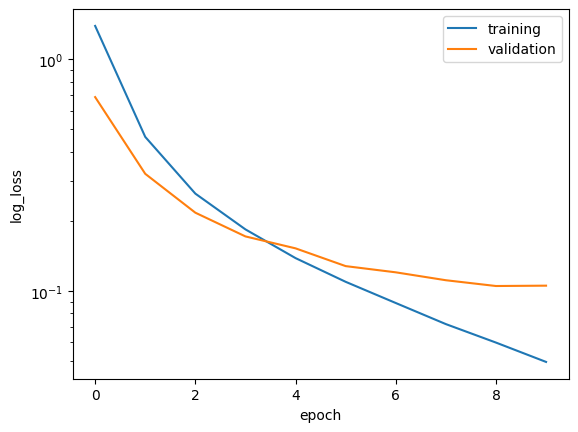

In [46]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')

**Figure 1:** This figure shows the training loss and the validation loss over the epochs. The training and the validation loss both decrease consistently over the epochs, although the curve for the training is steepre than the curve for the validation. This shows that the final loss for the neural networks was about 0.1. The model is fairly accurate at identifying what number was handwritten in the input image, even reading the data in 1D and not 2D. The handwritten numbers are all about the same size in the array, and if the size of the numbers varied, I would predict this neural network would be less accurate.

In [21]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9698 - loss: 0.1086


[0.09593942761421204, 0.9728999733924866]

In [80]:
model2 = keras.models.Sequential()
model2.add(layers.Conv2D(32, kernel_size=(10, 10), activation='relu', input_shape = (28,28,1)))
model2.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [81]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
history2 = model2.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8114 - loss: 0.6326 - val_accuracy: 0.9592 - val_loss: 0.1299
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9730 - loss: 0.0876 - val_accuracy: 0.9775 - val_loss: 0.0754
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.0572 - val_accuracy: 0.9785 - val_loss: 0.0697
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0452 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9851 - val_loss: 0.0491
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9859 - val_loss: 0.0474
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9845 - val_loss: 0.0565
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.

In [62]:
history2.history

{'accuracy': [0.9083333611488342,
  0.973288893699646,
  0.9813777804374695,
  0.9857555627822876,
  0.9884222149848938,
  0.9888666868209839,
  0.9913111329078674,
  0.9927999973297119,
  0.9925777912139893,
  0.9937999844551086],
 'loss': [0.30057066679000854,
  0.08648233860731125,
  0.06085975840687752,
  0.04561993107199669,
  0.03838670626282692,
  0.03375798463821411,
  0.02792293019592762,
  0.02320057526230812,
  0.022650636732578278,
  0.018332580104470253],
 'val_accuracy': [0.9557333588600159,
  0.9760000109672546,
  0.9806666374206543,
  0.979200005531311,
  0.9838666915893555,
  0.984333336353302,
  0.9855333566665649,
  0.9852666854858398,
  0.9861999750137329,
  0.9833999872207642],
 'val_loss': [0.14270585775375366,
  0.08208087831735611,
  0.06397297978401184,
  0.0664791390299797,
  0.057071760296821594,
  0.05147543549537659,
  0.04660838469862938,
  0.05309395492076874,
  0.04580982029438019,
  0.06170133501291275]}

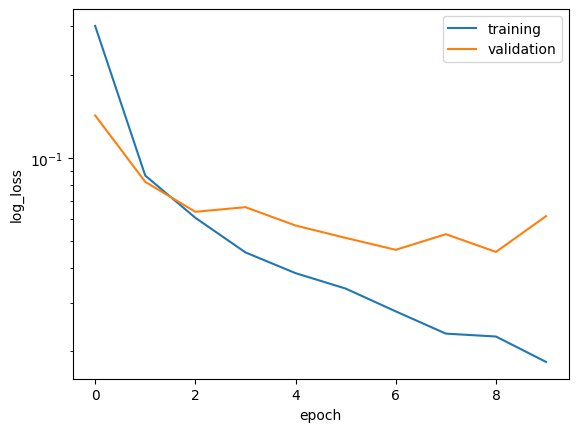

In [63]:
plt.plot(history2.history['loss'], label="training")
plt.plot(history2.history['val_loss'], label="validation")
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.legend()
plt.yscale('log')

**Figure 2:** This shows the training and validation loss over the epochs for the convolutional neural network. The loss function for training decreases over all the epochs, while the validation loss function increases and decreases over the epochs. The loss is noticeably lower compared to the loss for the original neural network plotted in Figure 1. While the loss for the validation was higher than 0.01 (10^-1 on the log scale) in Figure 1, the loss for the validation is lower than 0.01 for the convolutional neural network. The evaluation of both neural networks shows that the accuracy of the convolutional neural network is 0.9862 while the accuracy for the , non-convolutional neural network used is 0.9698. It makes sense for the convolutional neural network to be more accurate because it can take the input as a 2D image and fit for features in the image to recognize what number the image is.

In [83]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9862 - loss: 0.0465


[0.04050210863351822, 0.9884999990463257]